Задание:
Разработать программу для решения биквадратного уравнения.

Программа должна быть разработана в виде консольного приложения на языке Python.
Программа осуществляет ввод с клавиатуры коэффициентов А, В, С, вычисляет дискриминант и ДЕЙСТВИТЕЛЬНЫЕ корни уравнения (в зависимости от дискриминанта).
Коэффициенты А, В, С могут быть заданы в виде параметров командной строки ( вариант задания параметров приведен в конце файла с примером кода ). Если они не заданы, то вводятся с клавиатуры в соответствии с пунктом 2. Описание работы с параметрами командной строки.
Если коэффициент А, В, С введен или задан в командной строке некорректно, то необходимо проигнорировать некорректное значение и вводить коэффициент повторно пока коэффициент не будет введен корректно. Корректно заданный коэффициент - это коэффициент, значение которого может быть без ошибок преобразовано в действительное число.

In [ ]:

import sys
import math


def is_valid_number(value):
    """
    Проверяет, можно ли преобразовать значение в действительное число
    """
    try:
        float(value)
        return True
    except ValueError:
        return False


def get_coefficient(prompt, default_value=None):
    """
    Запрашивает коэффициент с клавиатуры с проверкой корректности
    """
    while True:
        try:
            if default_value is not None:
                value = input(f"{prompt} (по умолчанию {default_value}): ").strip()
                if value == "":
                    return float(default_value)
            else:
                value = input(f"{prompt}: ").strip()

            if is_valid_number(value):
                return float(value)
            else:
                print("Ошибка: введите действительное число!")
        except KeyboardInterrupt:
            print("\nПрограмма прервана пользователем")
            sys.exit(0)


def solve_biquadratic(a, b, c):

    # Проверка коэффициента A
    if a == 0:
        print("Ошибка: коэффициент A не может быть равен 0 для биквадратного уравнения!")
        return []

    # Вычисляем дискриминант для квадратного уравнения относительно y = x²
    discriminant = b ** 2 - 4 * a * c

    print(f"\nКоэффициенты: A = {a}, B = {b}, C = {c}")
    print(f"Дискриминант: D = {discriminant}")

    roots = []

    if discriminant < 0:
        print("Уравнение не имеет действительных корней")
    elif discriminant == 0:
        # Один корень для y = x²
        y = -b / (2 * a)
        print(f"y = x² = {y}")
        if y > 0:
            x1 = math.sqrt(y)
            x2 = -math.sqrt(y)
            roots.extend([x1, x2])
            print(f"Уравнение имеет два действительных корня: x₁ = {x1:.4f}, x₂ = {x2:.4f}")
        elif y == 0:
            roots.append(0)
            print(f"Уравнение имеет один действительный корень: x = 0")
        else:
            print("Уравнение не имеет действительных корней")
    else:
        # Два корня для y = x²
        y1 = (-b + math.sqrt(discriminant)) / (2 * a)
        y2 = (-b - math.sqrt(discriminant)) / (2 * a)

        print(f"y₁ = x² = {y1:.4f}, y₂ = x² = {y2:.4f}")

        # Обрабатываем y1
        if y1 > 0:
            x1 = math.sqrt(y1)
            x2 = -math.sqrt(y1)
            roots.extend([x1, x2])
            print(f"Из y₁ получаем корни: x₁ = {x1:.4f}, x₂ = {x2:.4f}")
        elif y1 == 0:
            roots.append(0)
            print("Из y₁ получаем корень: x = 0")

        # Обрабатываем y2
        if y2 > 0:
            x3 = math.sqrt(y2)
            x4 = -math.sqrt(y2)
            # Проверяем на дубликаты
            if x3 not in roots and -x3 not in roots:
                roots.extend([x3, x4])
                print(f"Из y₂ получаем корни: x₃ = {x3:.4f}, x₄ = {x4:.4f}")
        elif y2 == 0 and 0 not in roots:
            roots.append(0)
            print("Из y₂ получаем корень: x = 0")

    return roots


def main():

    print("=" * 60)
    print("ПРОГРАММА ДЛЯ РЕШЕНИЯ БИКВАДРАТНОГО УРАВНЕНИЯ")
    print("Уравнение вида: Ax⁴ + Bx² + C = 0")
    print("=" * 60)

    # Обработка параметров командной строки
    a_coef = None
    b_coef = None
    c_coef = None

    if len(sys.argv) >= 4:
        if is_valid_number(sys.argv[1]):
            a_coef = sys.argv[1]
        if is_valid_number(sys.argv[2]):
            b_coef = sys.argv[2]
        if is_valid_number(sys.argv[3]):
            c_coef = sys.argv[3]

    # Ввод коэффициентов
    print("\nВведите коэффициенты биквадратного уравнения:")

    if a_coef is not None:
        print(f"Коэффициент A задан в командной строке: {a_coef}")
    a = get_coefficient("Коэффициент A", a_coef)

    if b_coef is not None:
        print(f"Коэффициент B задан в командной строке: {b_coef}")
    b = get_coefficient("Коэффициент B", b_coef)

    if c_coef is not None:
        print(f"Коэффициент C задан в командной строке: {c_coef}")
    c = get_coefficient("Коэффициент C", c_coef)

    # Решение уравнения
    roots = solve_biquadratic(a, b, c)

    # Вывод результатов
    if roots:
        print(f"\nДействительные корни уравнения: {[f'{x:.4f}' for x in roots]}")
    else:
        print("\nУравнение не имеет действительных корней")

    print("\n" + "=" * 60)


if __name__ == "__main__":
    main()


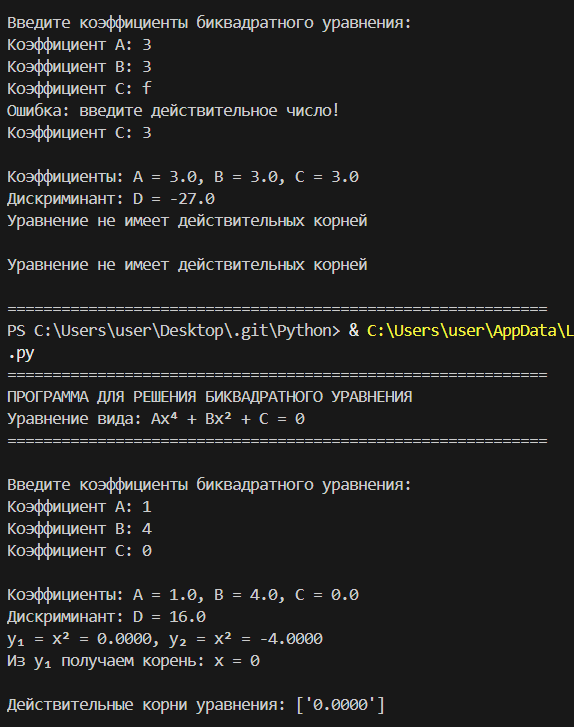